In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
S = ["path of photo"]

In [ ]:
def gray(image):
  return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
def denoised(image):
    return cv2.fastNlMeansDenoising(image, None, h=10, templateWindowSize=7, searchWindowSize=21)

In [ ]:
def equalized(image):
    return cv2.equalizeHist(image)

In [ ]:
def inpainted(image, Oimage):
    mask = cv2.threshold(image, 250, 255, cv2.THRESH_BINARY)[1]
    return cv2.inpaint(Oimage, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

In [ ]:
def contrast(image):
     return cv2.convertScaleAbs(image, alpha=1.2, beta=0)

In [ ]:
def sharpened(image):
    sharpening_filter = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], dtype=np.float32)
    return cv2.filter2D(image, -1, sharpening_filter)

In [ ]:
def Display(Images):
    l = ['Original image', 'Gray image', 'Denoised image', 'Equalized image', 'Inpainted image', 'Contrast image', 'Sharpened image']
    plt.figure(figsize=(20, 4))
    c = -1
    for i in Images:
      c = c + 1
      plt.subplot(1, 7, c+1)
      plt.imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))
      plt.title(l[c])
    plt.show

In [ ]:
def Restoration_image(image):
      # Load the damaged image
    Original_image = cv2.imread(image)

    # Check if the image is loaded successfully
    if Original_image is None:
        print(f"Error: Unable to load the image from {image}")
        return
    Gray_image = gray(Original_image)
    Denoised_image = denoised(Gray_image)
    Equalized_image = equalized(Denoised_image)
    Inpainted_image = inpainted(Equalized_image, Original_image)
    Contrast_image = contrast(Inpainted_image)
    Sharpened_image = sharpened(Contrast_image)
    I = [Original_image, Gray_image, Denoised_image, Equalized_image, Inpainted_image, Contrast_image, Sharpened_image]
    Display(I)

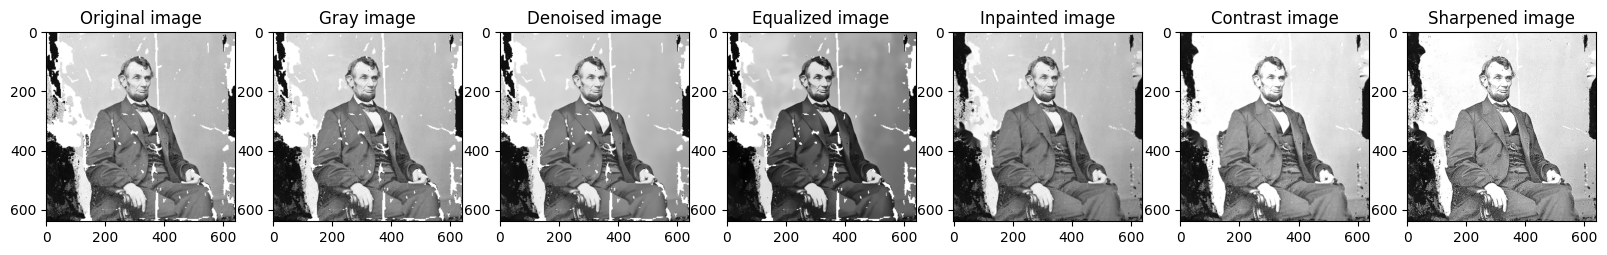

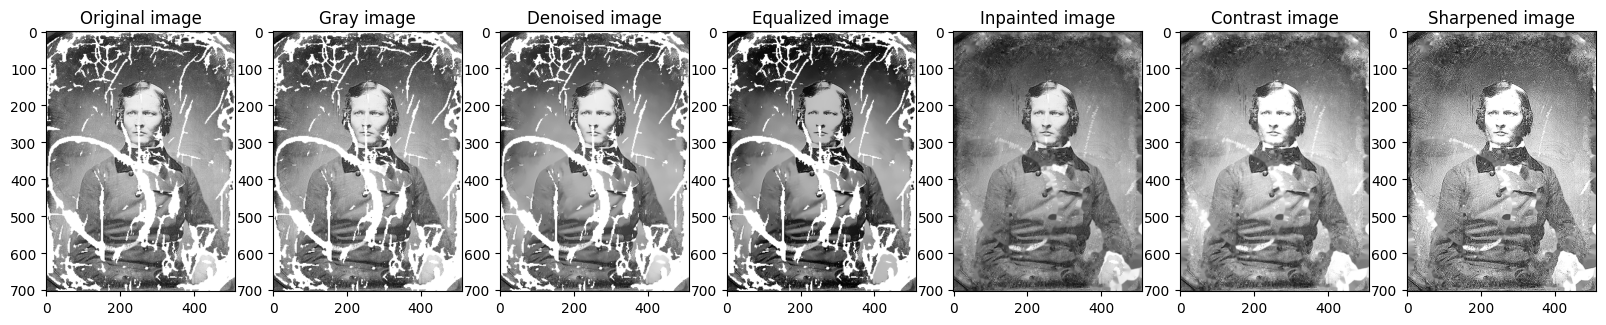

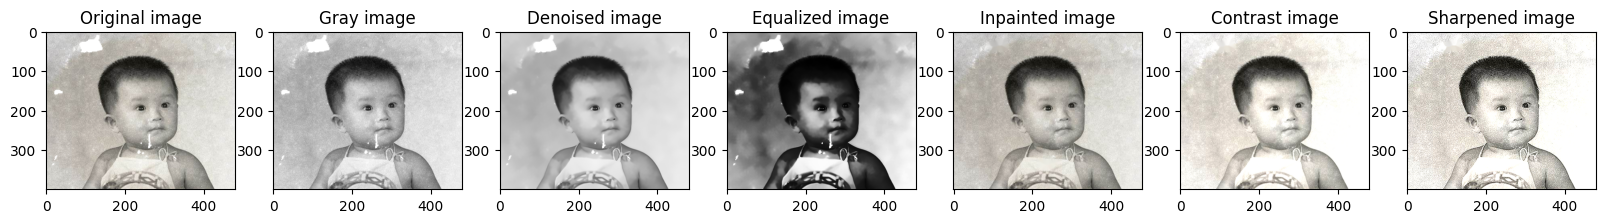

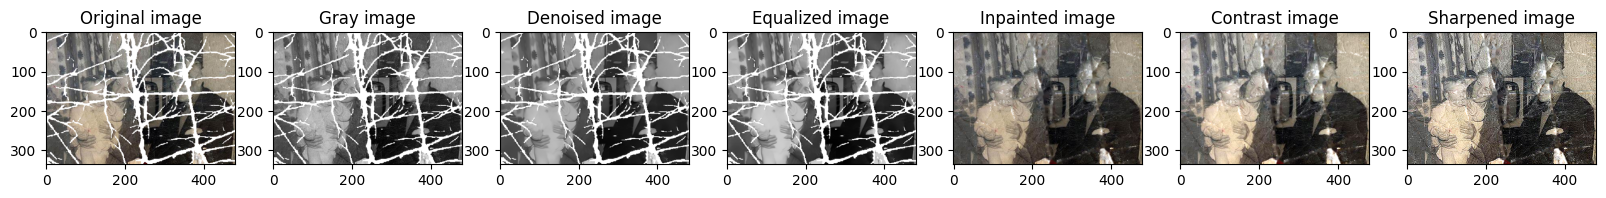

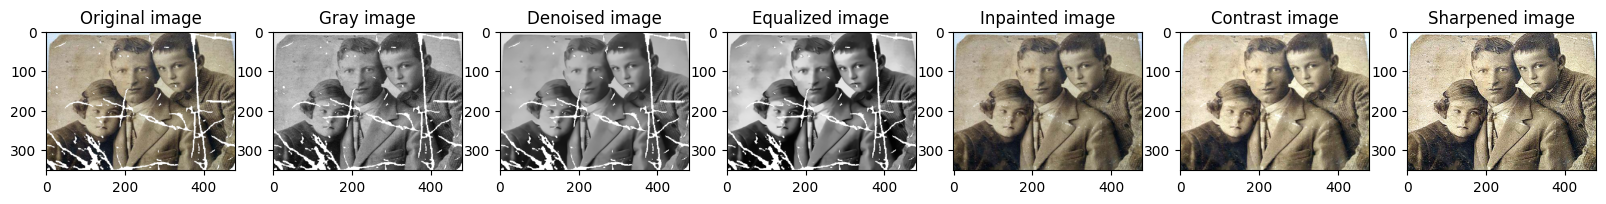

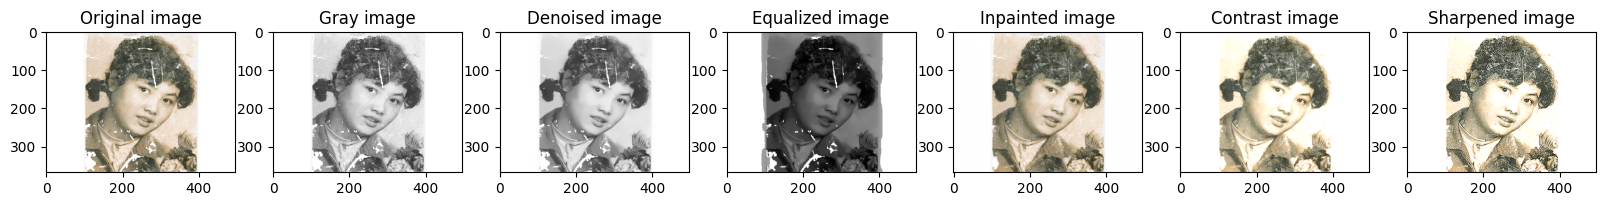

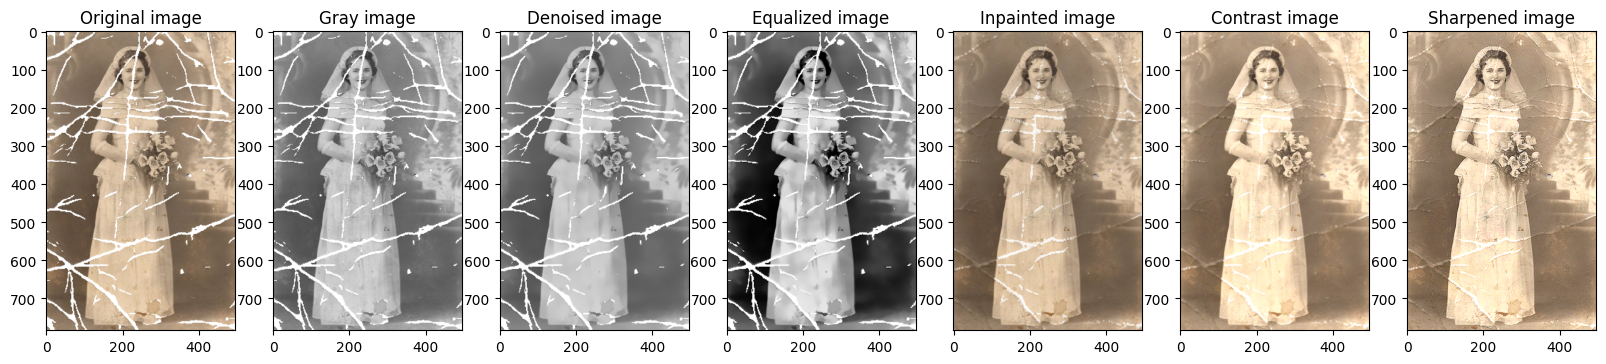

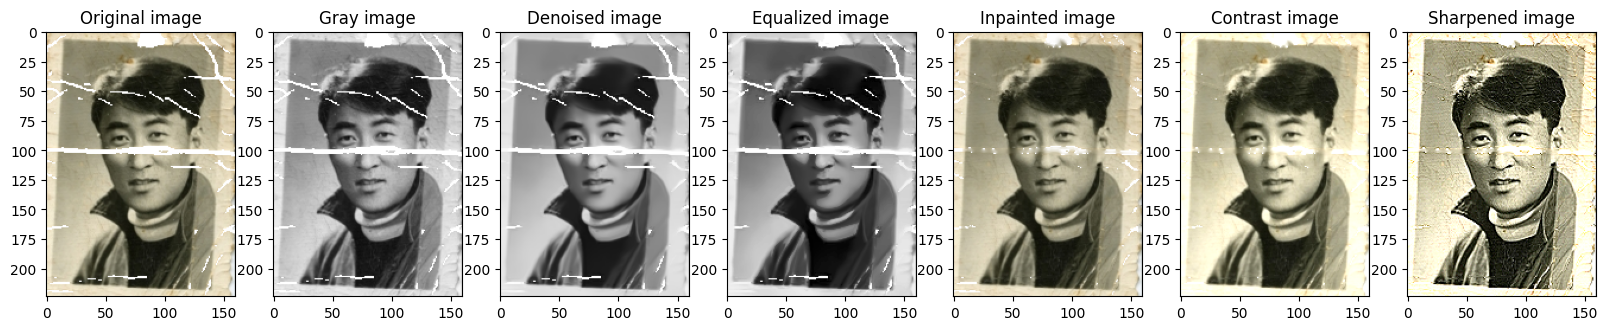

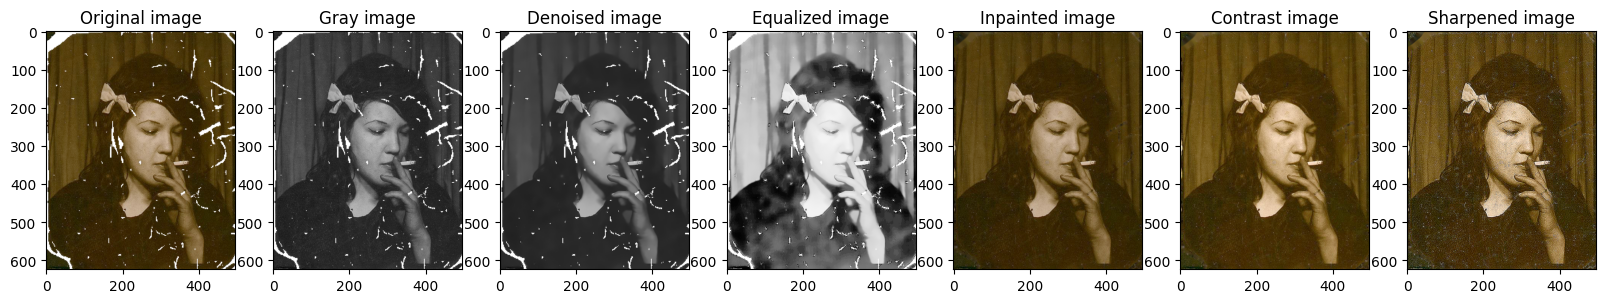

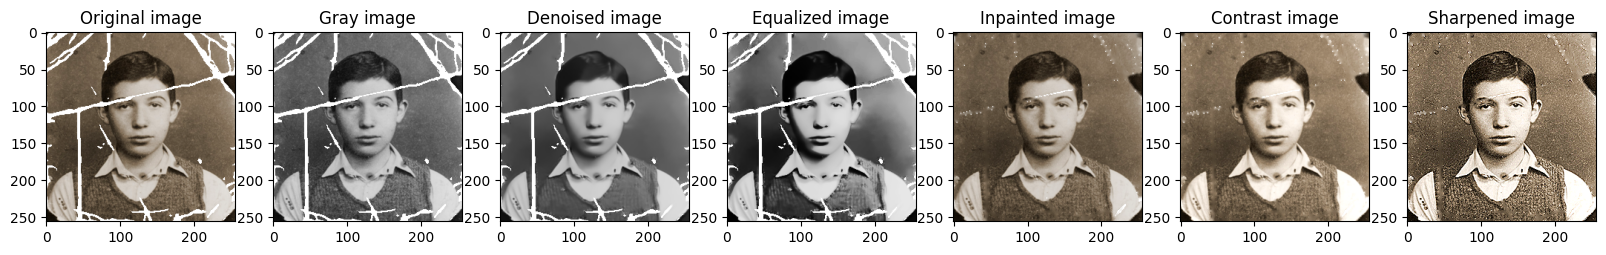

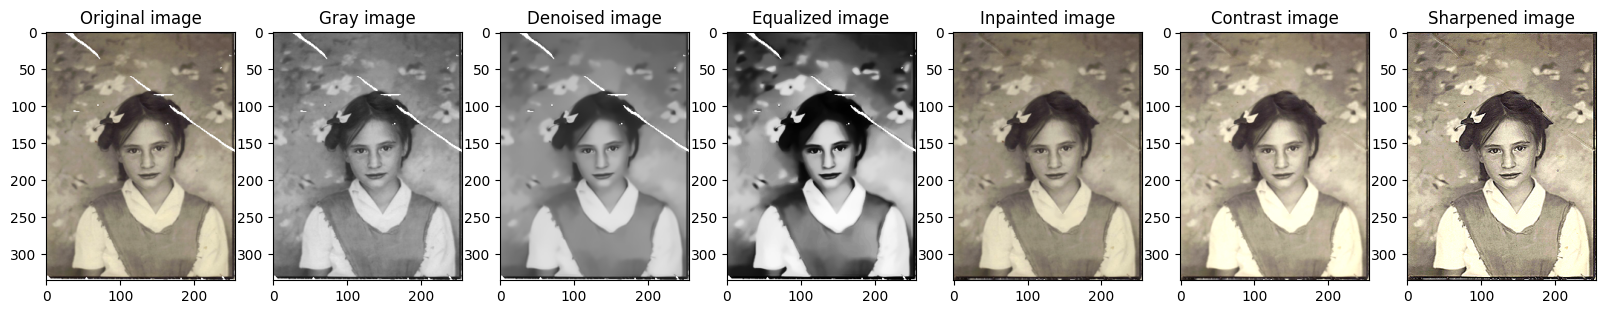

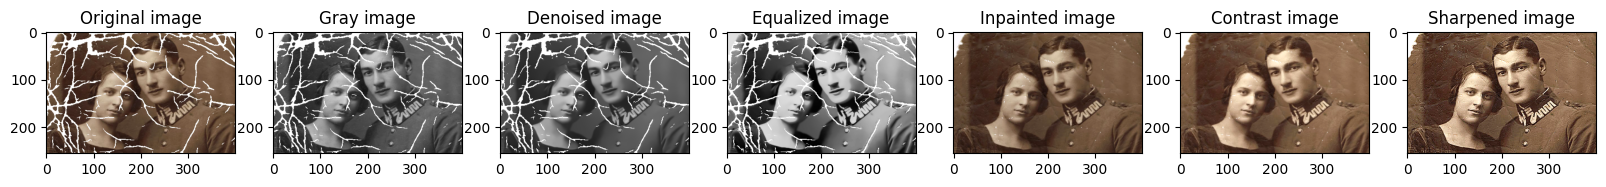

In [ ]:
for i in S:
    Restoration_image(i)